# 20200513 - Criação de *Design* do Experimento

## Importação de pacotes necessários para criação de conjuntos de cartões estímulos

In [1]:
# Pacotes da linguagem Python que auxiliam no gerenciamento de tabelas de dados (dataframes)
import pandas as pd
import numpy as np
import itertools

# Pacote de interação da linguagem R dentro de um Jupyter Notebook
import rpy2.rinterface

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
# Pacotes da linguagem R para manipulação de tabelas de dados e realização de conjoint analyses

require(base)
require(utils)
require(conjoint)

R[write to console]: Loading required package: conjoint

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



## Listando o conjunto de atributos e variáveis escolhidos para o experimento e expandindo a lista em todas as possíveis combinações

In [4]:
%%R -o atributos

atributos <- expand.grid(
    PcMaquina = c("50", "150", "250"),
    TxDebito = c("1.9", "2.1", "2.3"),
    TxCreditoVista = c("2.0", "3.5", "5.0"),
    TxCredParcelas = c("1.5", "2.0", "2.5"),
    Chip = c("Nao", "Sim"),
    AppGestao = c("Nao", "Sim"),
    Atendimento24h = c("Nao", "Sim")
)

In [5]:
atributos

,PcMaquina,TxDebito,TxCreditoVista,TxCredParcelas,Chip,AppGestao,Atendimento24h
1,50,1.9,2.0,1.5,Nao,Nao,Nao
2,150,1.9,2.0,1.5,Nao,Nao,Nao
3,250,1.9,2.0,1.5,Nao,Nao,Nao
4,50,2.1,2.0,1.5,Nao,Nao,Nao
5,150,2.1,2.0,1.5,Nao,Nao,Nao
...,...,...,...,...,...,...,...
644,150,2.1,5.0,2.5,Sim,Sim,Sim
645,250,2.1,5.0,2.5,Sim,Sim,Sim
646,50,2.3,5.0,2.5,Sim,Sim,Sim
647,150,2.3,5.0,2.5,Sim,Sim,Sim


**Existem 648 combinações possíveis - um número inviável de ser testado para o experimento em questão.**

## Criando um design fatorial para minimizar número de escolhas com melhor eficiência de ortogonalidade

In [6]:
%%R -o design_otimo

design_otimo <- caFactorialDesign(atributos, type = 'fractional', seed = 123)

In [7]:
design_otimo.shape

(17, 7)

#### O primeiro design possui um conjunto de 17 cartões. Para tornar o experimento de comparação em pares possível, será gerado um conjunto com 18 cartões.

In [8]:
%%R -o design_otimo

design_otimo <- caFactorialDesign(atributos, type = 'fractional', cards = 18, seed = 123)

In [9]:
design_otimo

,PcMaquina,TxDebito,TxCreditoVista,TxCredParcelas,Chip,AppGestao,Atendimento24h
13,50,2.1,3.5,1.5,Nao,Nao,Nao
106,50,2.3,5.0,1.5,Sim,Nao,Nao
113,150,2.1,2.0,2.0,Sim,Nao,Nao
156,250,1.9,5.0,2.5,Sim,Nao,Nao
165,250,1.9,2.0,1.5,Nao,Sim,Nao
204,250,2.1,3.5,2.0,Nao,Sim,Nao
215,150,2.3,5.0,2.0,Nao,Sim,Nao
223,50,2.3,2.0,2.5,Nao,Sim,Nao
308,150,1.9,3.5,2.5,Sim,Sim,Nao
326,150,1.9,2.0,1.5,Nao,Nao,Sim


In [10]:
%%R -o cod_design_otimo

cod_design_otimo <- caEncodedDesign(design_otimo)

### Para compreender uma boa eficiência de ortogonalidade, é elaborada uma matriz de correlação entre os cartões.

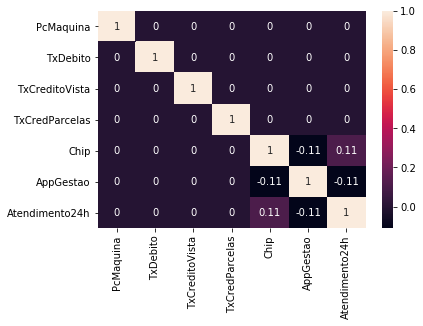

In [11]:
import seaborn as sns
%matplotlib inline

heat = cod_design_otimo.corr()

sns.heatmap(heat, annot = True)

## Salvando o resultado em arquivos para consulta posterior e criação do formulário

In [12]:
design_otimo.to_csv('design.csv')
cod_design_otimo.to_csv('cod_design.csv')